# Линейная регрессия: переобучение и регуляризация

В этом задании мы на примерах увидим, как переобучаются линейные модели, разберем, почему так происходит, и выясним, как диагностировать и контролировать переобучение.

Во всех ячейках, где написан комментарий с инструкциями, нужно написать код, выполняющий эти инструкции. Остальные ячейки с кодом (без комментариев) нужно просто выполнить. Кроме того, в задании требуется отвечать на вопросы; ответы нужно вписывать после выделенного слова "__Ответ:__".

In [48]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Мы будем работать с датасетом __"bikes_rent.csv"__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.

### Знакомство с данными

## Задание 1

Загрузите датасет с помощью функции __pandas.read_csv__ в переменную __df__. Выведите первые 5 строчек, чтобы убедиться в корректном считывании данных:

In [49]:
df = pd.read_csv('bikes_rent.csv')
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для каждого дня проката известны следующие признаки:
* _season_: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в Цельсиях
* _atemp_: температура по ощущениям в Цельсиях
* _hum_: влажность
* _windspeed(mph)_: скорость ветра в милях в час
* _windspeed(ms)_: скорость ветра в метрах в секунду
* _cnt_: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Итак, у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок. Давайте посмотрим на графиках, как целевой признак зависит от остальных

Постройте графики зависимостей атрибутов от количества поездок. Другими словами вам нужно построить 12 графиков. На каждом должна быть изображена зависимость очередного атрибута от переменной **cnt**.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

## Залежність атрибуту від кількості поїздок?. %)
## Логічніше було б будувати залежність: `кількість поїздок від атрибуту`.

In [50]:
def draw_graphs(df: pd.DataFrame, idx_x: int = -1, color: str = 'g') -> None:
    for idx_y in range(df.shape[1]):
        if df.columns[idx_y] == df.columns[idx_x]:
            continue

        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].scatter(df.iloc[:, idx_x], df.iloc[:, idx_y], color=color, marker='+', linestyle='', s=120)
        axs[0].set_xlabel(df.columns[idx_x], fontsize='small', color='midnightblue')
        axs[0].set_ylabel(df.columns[idx_y], fontsize='small', color='midnightblue')
        
        axs[1].bar(df.iloc[:, idx_x], df.iloc[:, idx_y], color=color)
        axs[1].set_xlabel(df.columns[idx_x], fontsize='small', color='midnightblue')
        axs[1].set_ylabel(df.columns[idx_y], fontsize='small', color='midnightblue')

        axs[2].bar(df.iloc[:, idx_y], df.iloc[:, idx_x], color=color)
        axs[2].set_xlabel(df.columns[idx_y], fontsize='small', color='midnightblue')
        axs[2].set_ylabel(df.columns[idx_x], fontsize='small', color='midnightblue')

        axs[3].scatter(df.iloc[:, idx_y], df.iloc[:, idx_x], color=color, marker='+', linestyle='', s=120)
        axs[3].set_xlabel(df.columns[idx_y], fontsize='small', color='midnightblue')
        axs[3].set_ylabel(df.columns[idx_x], fontsize='small', color='midnightblue')

        fig.suptitle(f'{df.columns[idx_y]}({df.columns[idx_x]})', fontsize=14)

        axs[0].set_title('scatter', fontsize=10)
        axs[1].set_title('bar', fontsize=10)
        axs[2].set_title('reverse bar', fontsize=10)
        axs[3].set_title('reverse scatter', fontsize=10)

        plt.show()


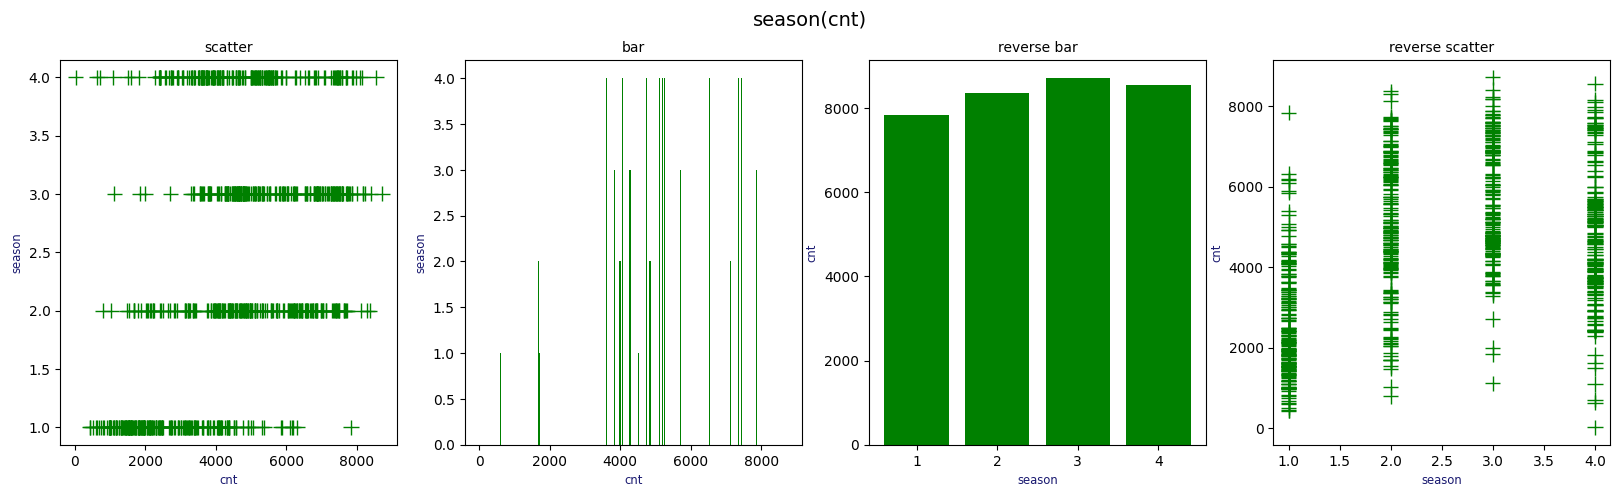

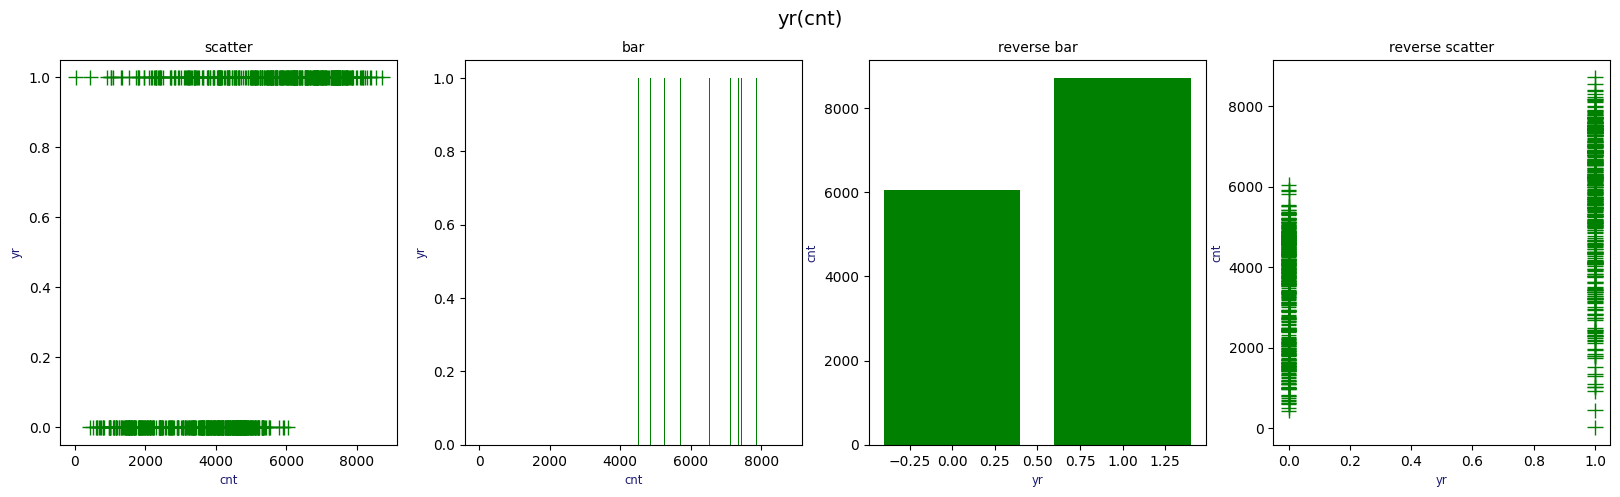

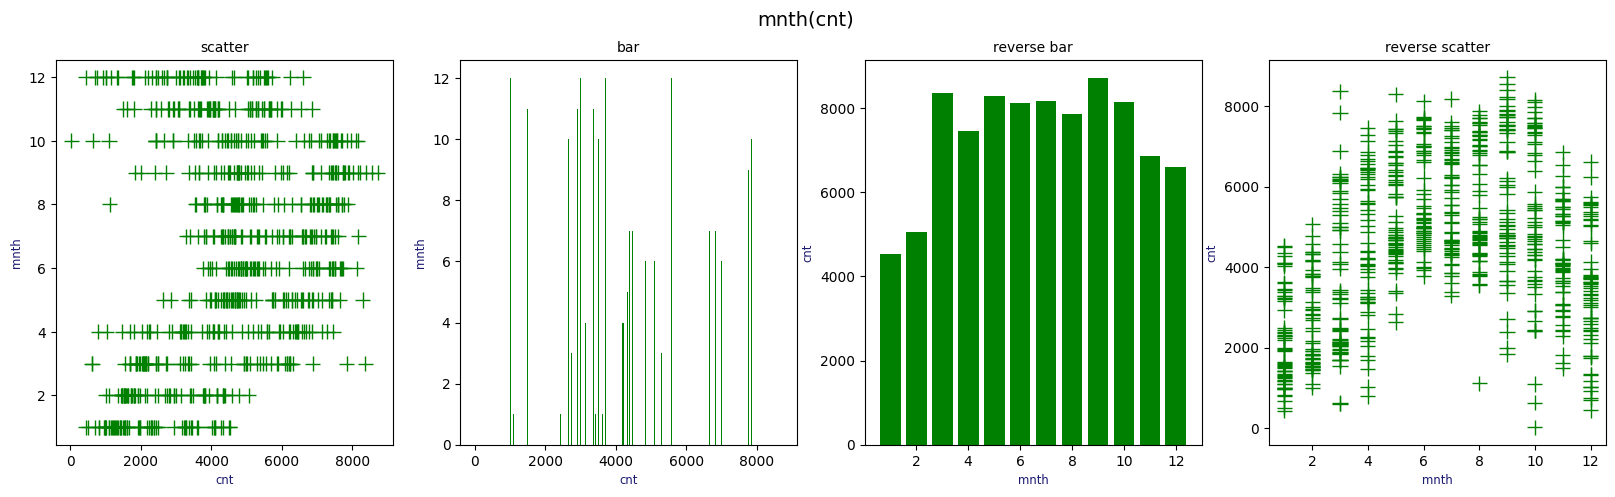

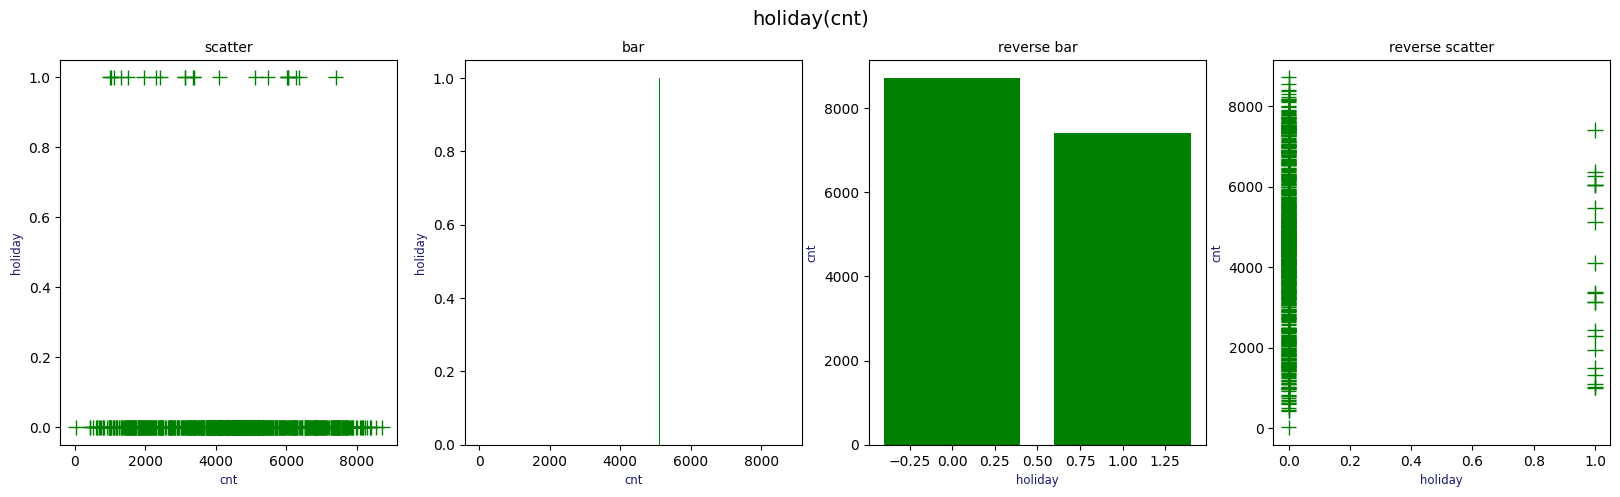

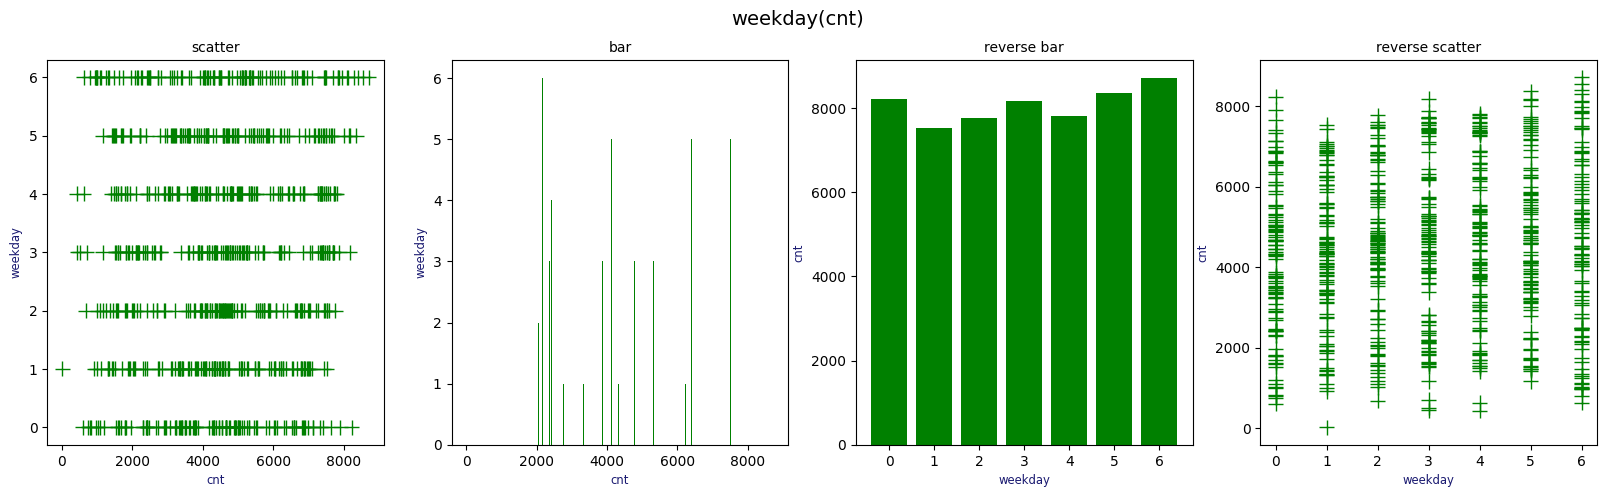

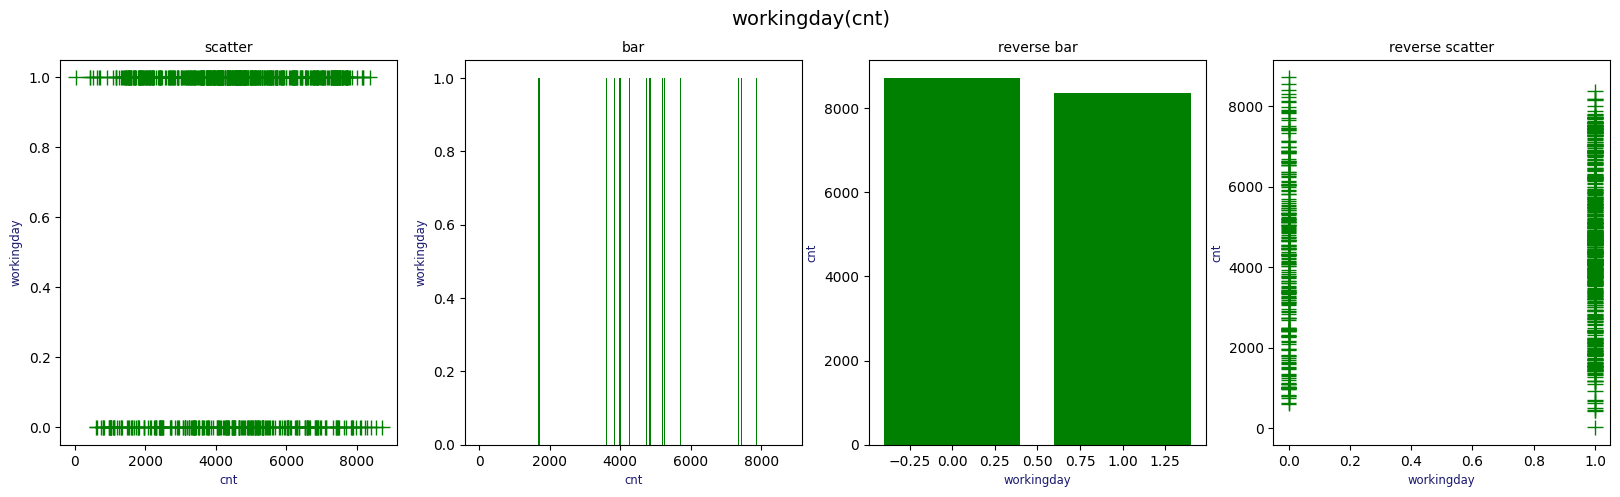

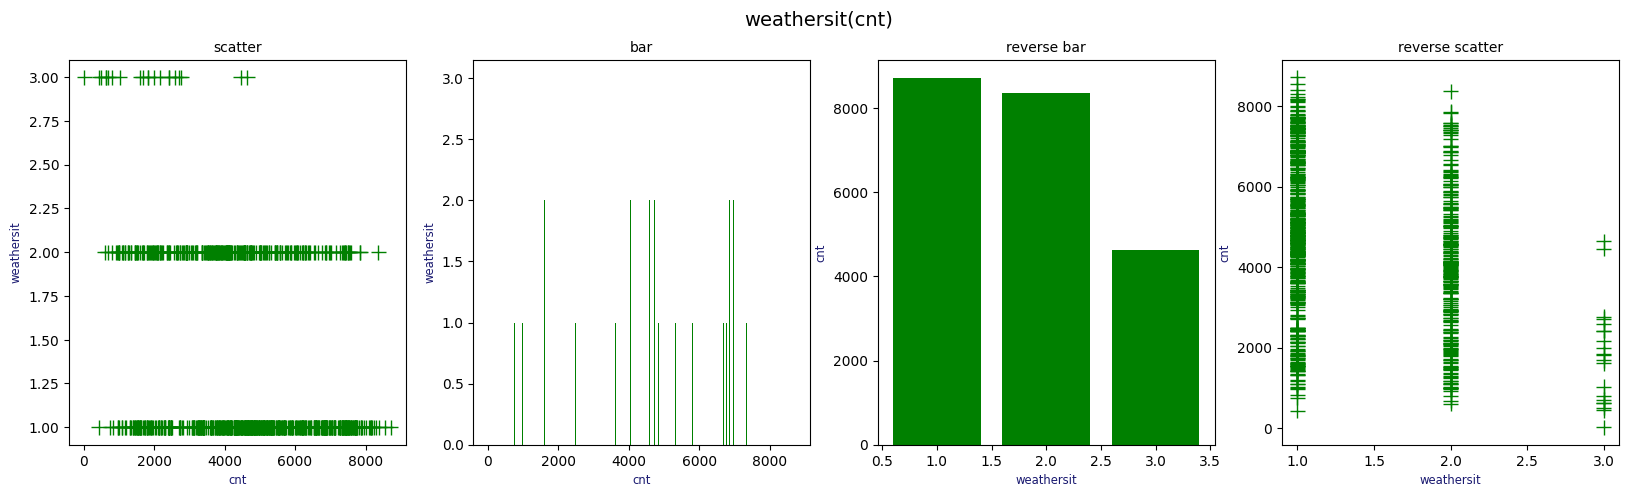

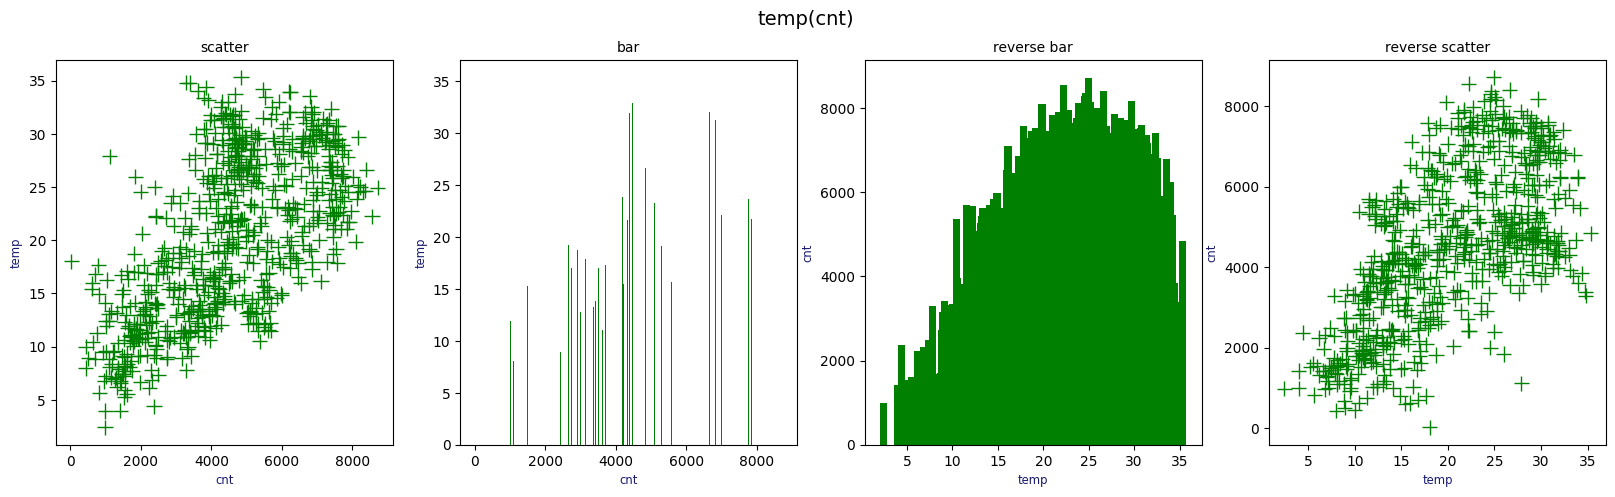

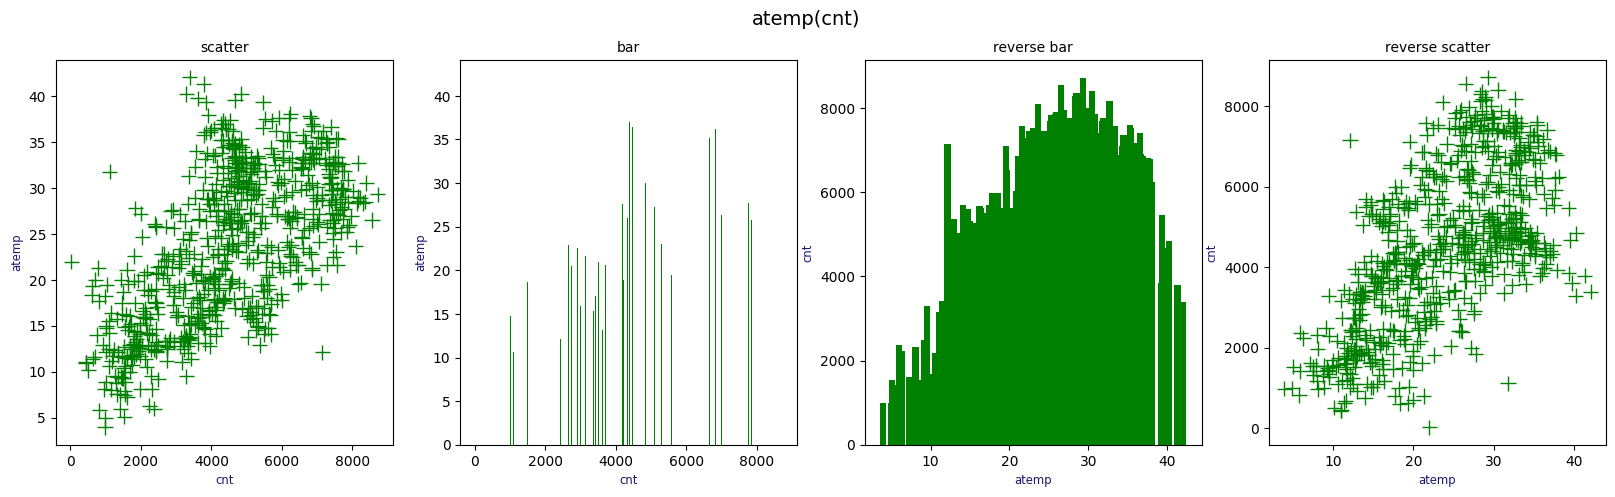

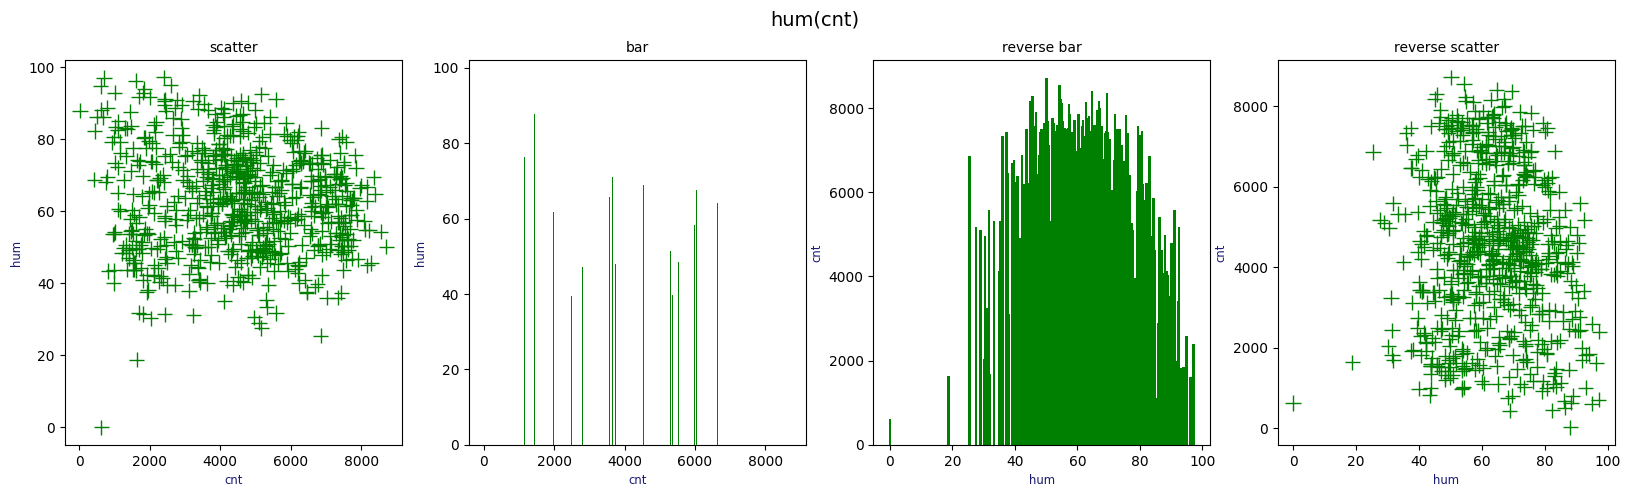

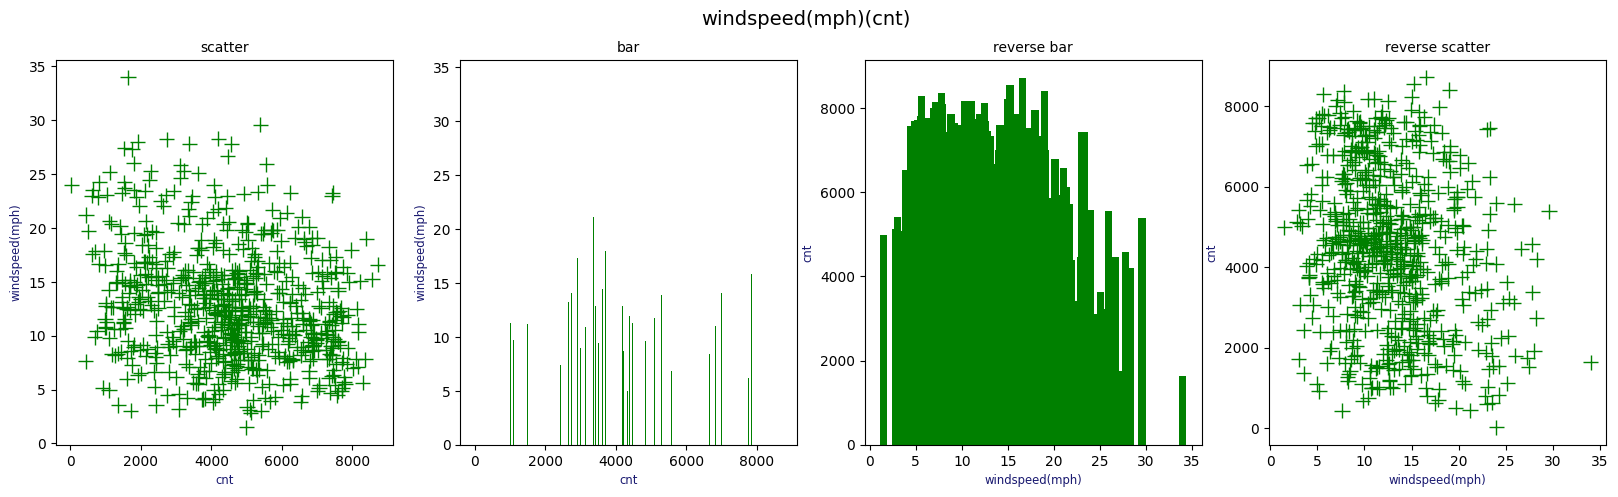

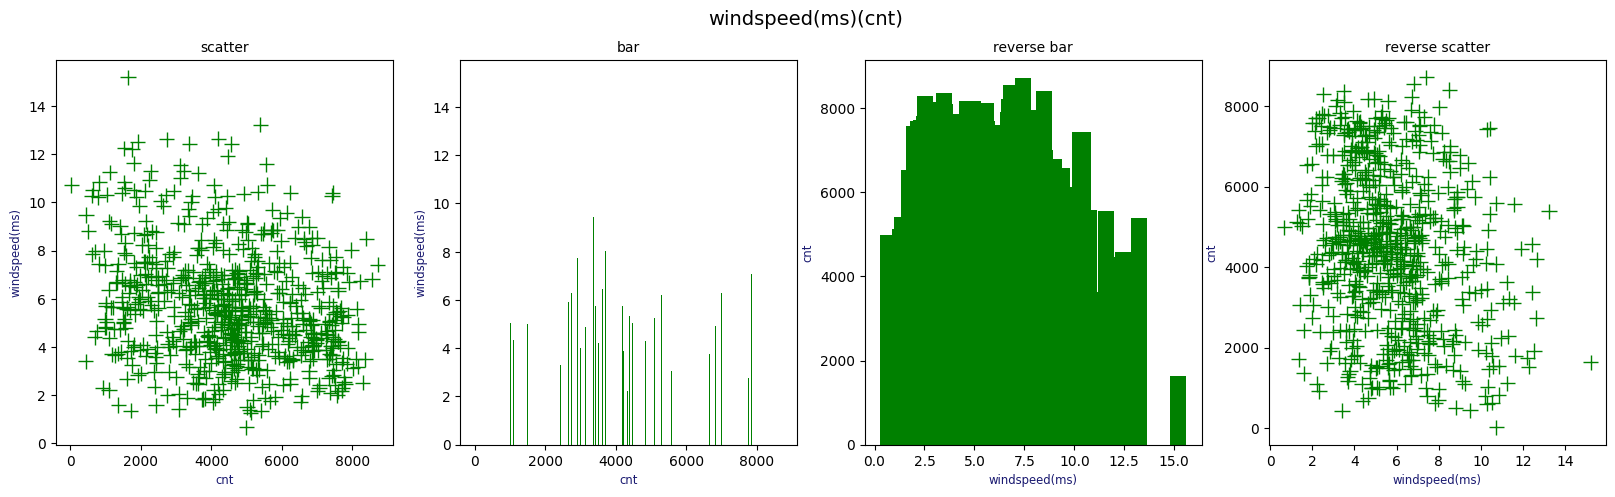

In [51]:
draw_graphs(df)

- https://seaborn.pydata.org/tutorial/axis_grids.html

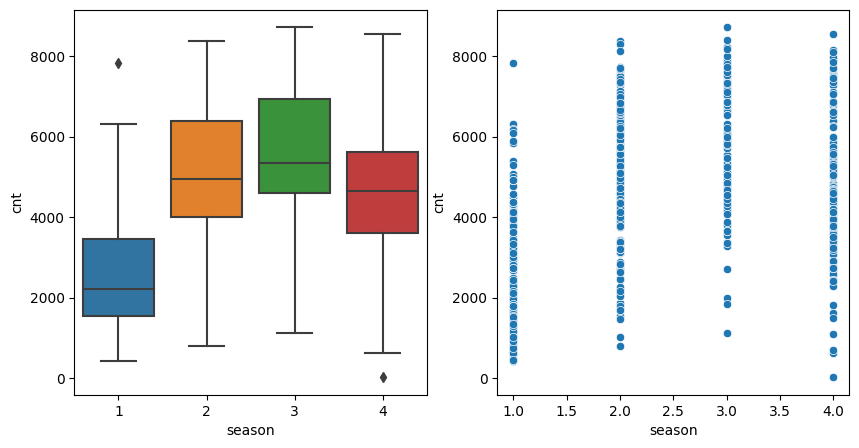

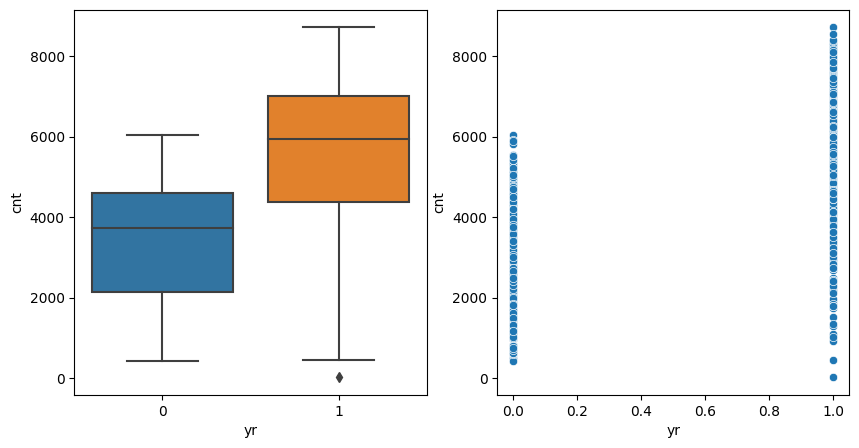

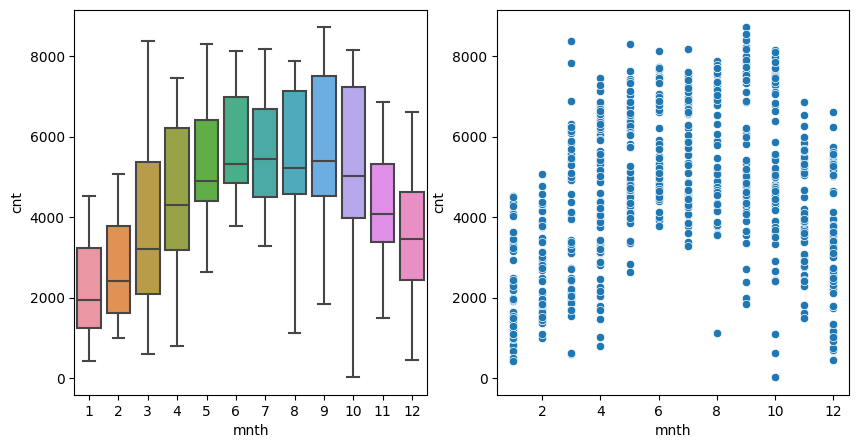

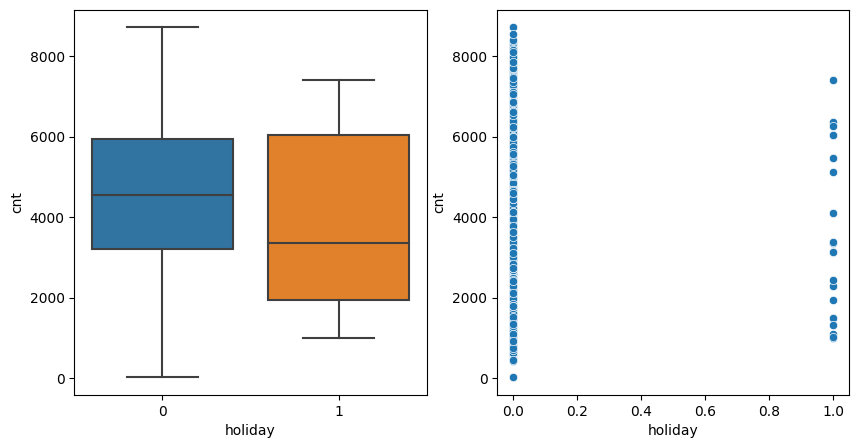

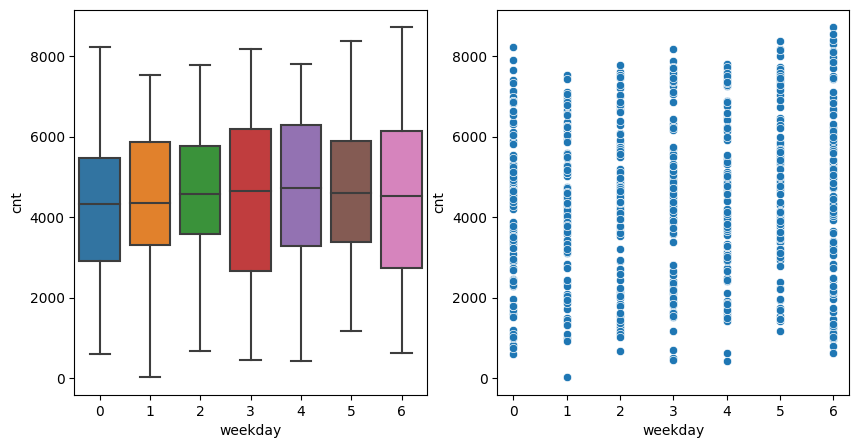

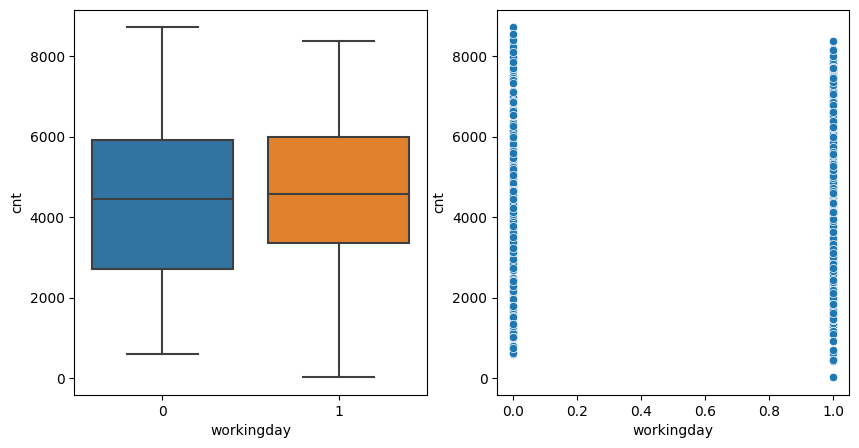

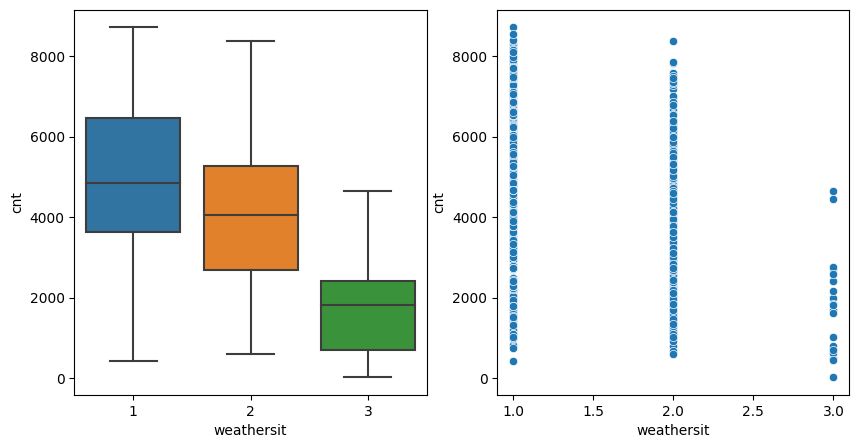

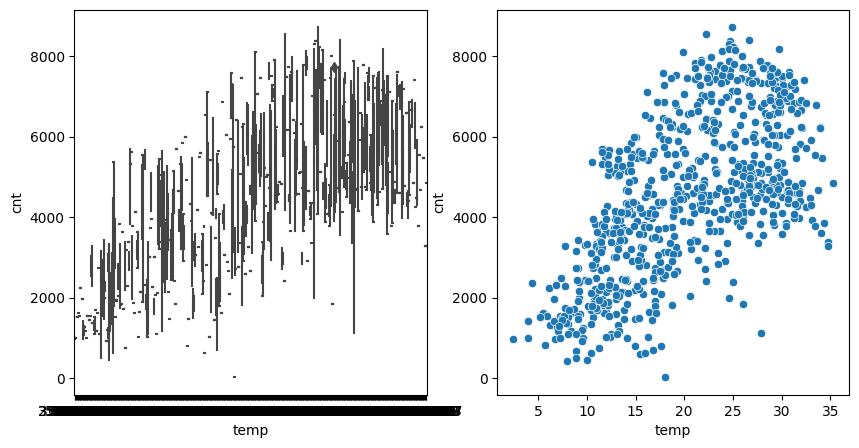

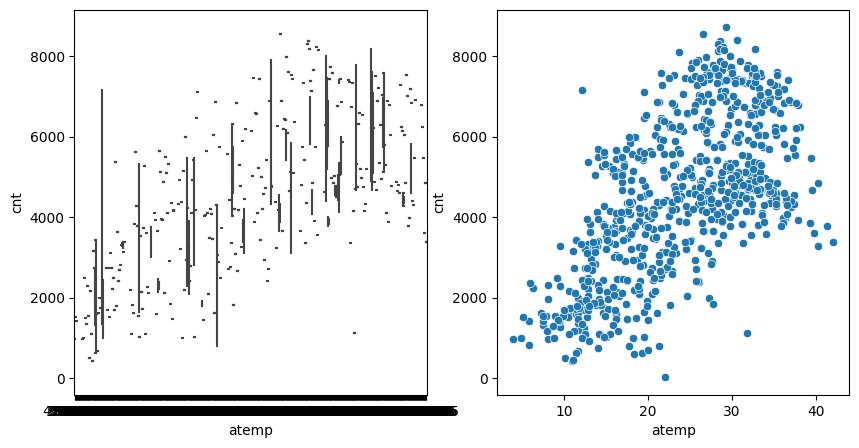

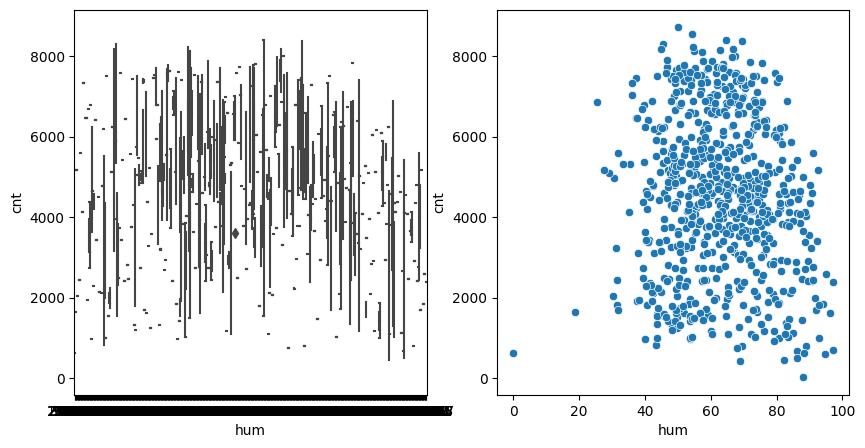

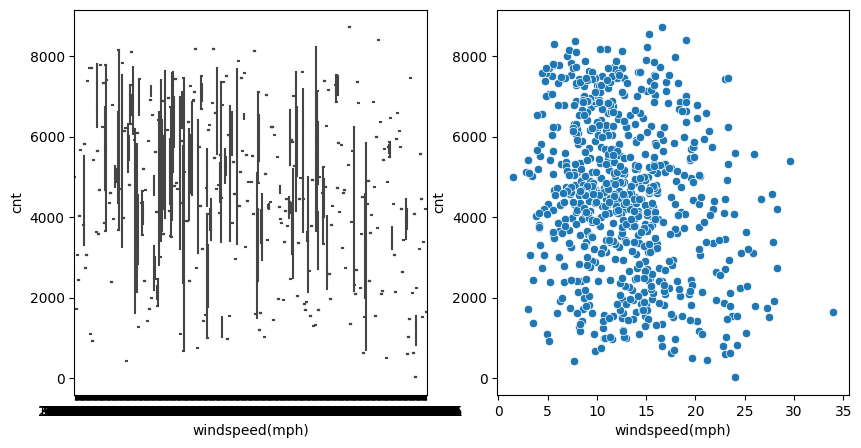

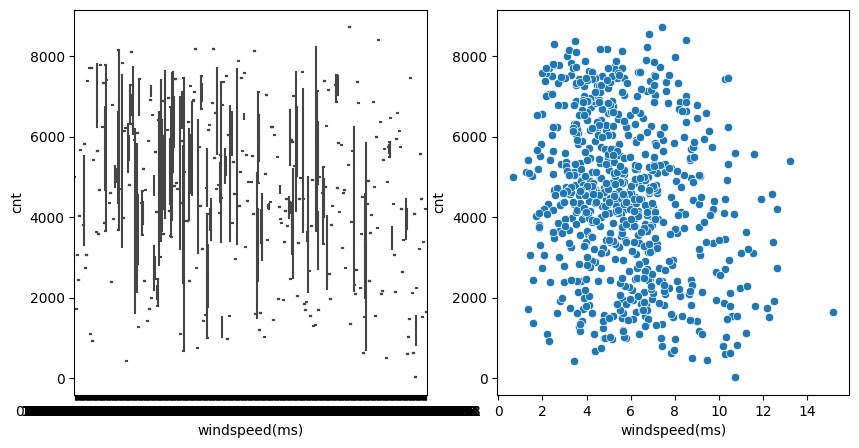

In [52]:
def seaborn_plotter(independent_vs: pd.DataFrame, dependent_v: pd.core.series.Series, df: pd.DataFrame) -> None:
    for i in independent_vs:
        plt.figure(figsize=(10,5))
        ax1 = plt.subplot(1,2,1)
        ax2 = plt.subplot(1,2,2)
        sns.boxplot(x=i, y=dependent_v, data=df, ax=ax1)
        sns.scatterplot(x=i, y=dependent_v, data=df, ax=ax2)


seaborn_plotter(df.iloc[:, :-1], df.iloc[:, -1], df)

__Вопросы:__
1. Каков характер зависимости числа прокатов от месяца?
1. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно

## 1: Характер залежності кількості поїздок від місяця, апроксимуючи лінією:
- схожий на обернену параболу, якщо розглядати відрізок з січня по грудень;
- схожий на параболу, якщо розглядати відрізок з червня одного року по травень наступного року;
- наближена пряма, на відрізках: січень-червень, липень-грудень;
- профіль синусоїди, якщо розглядати роки (циклічне чередування місяців).
## Приблизно більш-менш лінійний характер, якщо узагальнити.

## 2: В залежності від `season`, `month`, і мабуть ще `weathersit` в найбільшій мірі більш лінійна(але не прямолінійна) залежність кількість прокатів.
## `weekday`, `temp`, `atemp` - схоже на прямолінійну залежність.
## Можливо ще `workingday` та `yr`, але навпевно замало параметрів, як от лише 2 роки.

## Задание 2

Давайте более строго оценим уровень линейной зависимости между признаками и целевой переменной. Хорошей мерой линейной зависимости между двумя векторами является корреляция Пирсона. Нам уже приходилось иметь с ней дело раньше. Для ее вычисления в pandas можно использовать методы датафрейма: corr и corrwith.

Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода `corrwith`.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html

In [53]:
df.iloc[:, :-1].corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


In [54]:
df.corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.

По графикам видно, что некоторые признаки похожи друг на друга. Поэтому давайте также посчитаем корреляции между вещественными признаками.

## Задание 3

Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
с помощью метода corr:

In [55]:
df.iloc[:, 7:].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [56]:
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


- https://www.geeksforgeeks.org/permutation-and-combination-in-python/

In [57]:
from itertools import combinations


def print_pairwise_correlations(df: pd.DataFrame) -> None:
    list_comb = list(combinations(list(df.columns), 2))
    [print(f'{el[0]} / {el[1]}: {df[[el[0], el[1]]].corr().iloc[0, 1]}', end='\n\n') for el in list_comb]


print_pairwise_correlations(df.iloc[:, 7:])

temp / atemp: 0.9917015532294642

temp / hum: 0.12696293902718844

temp / windspeed(mph): -0.15794412041209963

temp / windspeed(ms): -0.15794412041210718

temp / cnt: 0.6274940090334912

atemp / hum: 0.13998805994655938

atemp / windspeed(mph): -0.18364296669082858

atemp / windspeed(ms): -0.1836429666908312

atemp / cnt: 0.631065699849181

hum / windspeed(mph): -0.24848909864371424

hum / windspeed(ms): -0.24848909864368154

hum / cnt: -0.10065856213715627

windspeed(mph) / windspeed(ms): 0.9999999999999993

windspeed(mph) / cnt: -0.2345449974216701

windspeed(ms) / cnt: -0.2345449974216897



На диагоналях, как и полагается, стоят единицы. Однако в матрице имеются еще две пары сильно коррелирующих столбцов: temp и atemp (коррелируют по своей природе) и два windspeed (потому что это просто перевод одних единиц в другие). Далее мы увидим, что этот факт негативно сказывается на обучении линейной модели.

Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

## Задание 4

Выведите средние признаков

In [58]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

- https://www.statology.org/matplotlib-distribution-plot/

<Figure size 600x600 with 0 Axes>

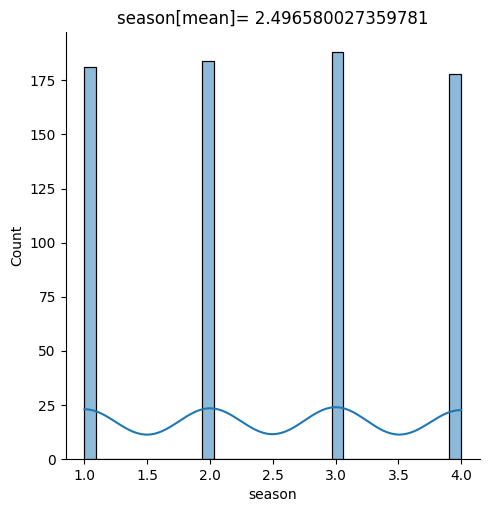

count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64


<Figure size 600x600 with 0 Axes>

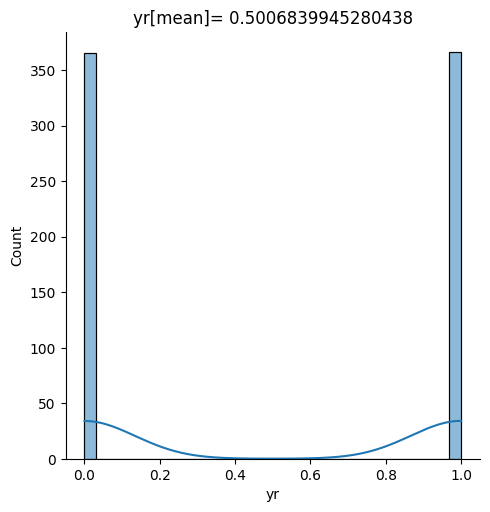

count    731.000000
mean       0.500684
std        0.500342
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: yr, dtype: float64


<Figure size 600x600 with 0 Axes>

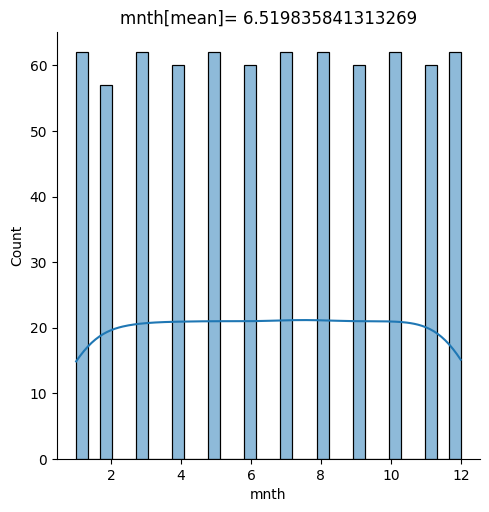

count    731.000000
mean       6.519836
std        3.451913
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64


<Figure size 600x600 with 0 Axes>

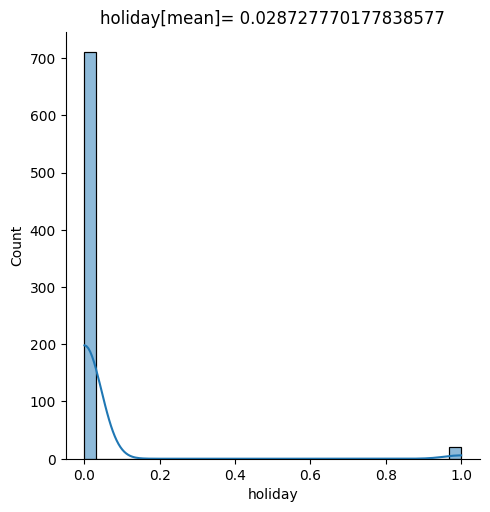

count    731.000000
mean       0.028728
std        0.167155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64


<Figure size 600x600 with 0 Axes>

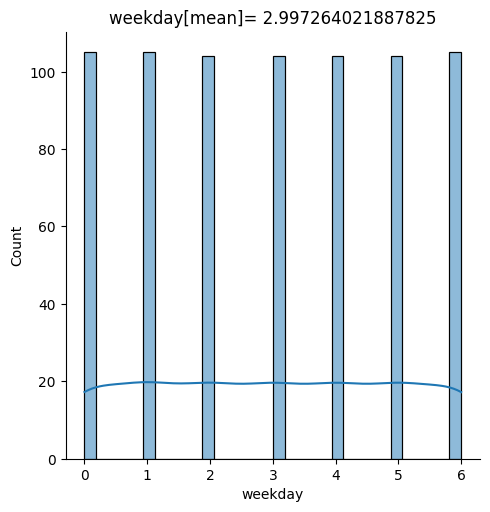

count    731.000000
mean       2.997264
std        2.004787
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64


<Figure size 600x600 with 0 Axes>

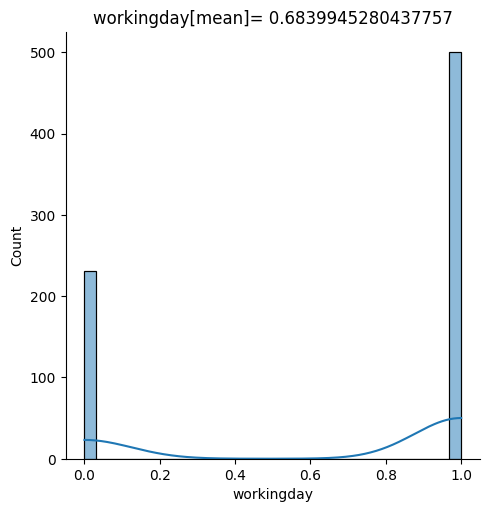

count    731.000000
mean       0.683995
std        0.465233
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64


<Figure size 600x600 with 0 Axes>

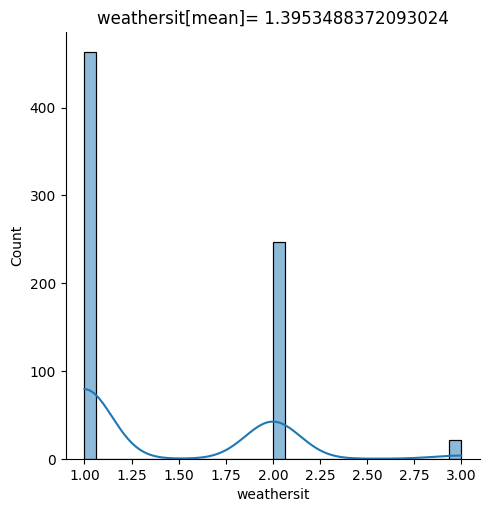

count    731.000000
mean       1.395349
std        0.544894
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64


<Figure size 600x600 with 0 Axes>

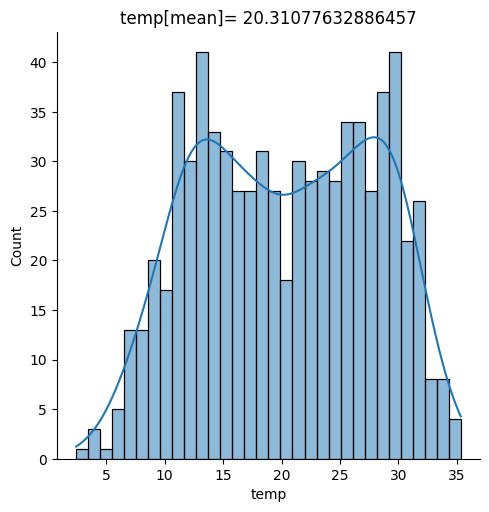

count    731.000000
mean      20.310776
std        7.505091
min        2.424346
25%       13.820424
50%       20.431653
75%       26.872076
max       35.328347
Name: temp, dtype: float64


<Figure size 600x600 with 0 Axes>

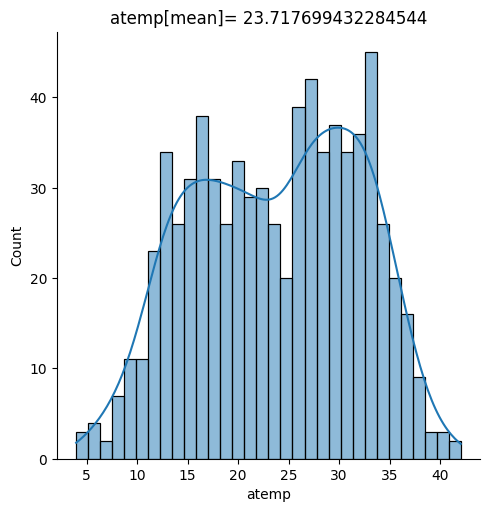

count    731.000000
mean      23.717699
std        8.148059
min        3.953480
25%       16.892125
50%       24.336650
75%       30.430100
max       42.044800
Name: atemp, dtype: float64


<Figure size 600x600 with 0 Axes>

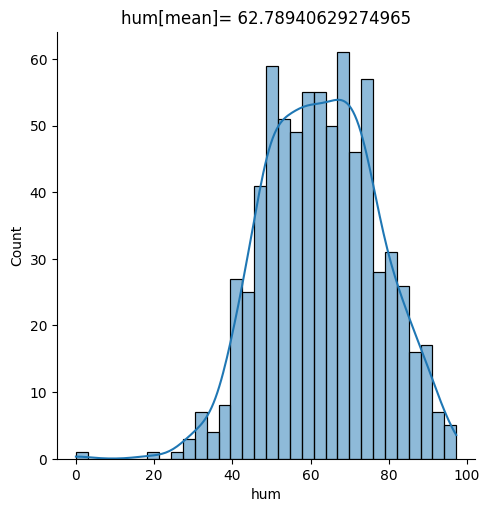

count    731.000000
mean      62.789406
std       14.242910
min        0.000000
25%       52.000000
50%       62.666700
75%       73.020850
max       97.250000
Name: hum, dtype: float64


<Figure size 600x600 with 0 Axes>

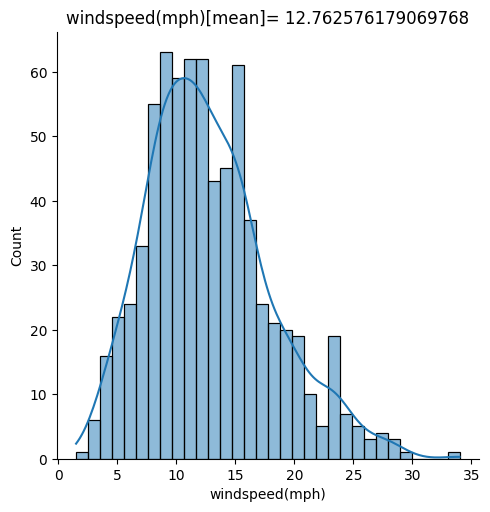

count    731.000000
mean      12.762576
std        5.192357
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625371
max       34.000021
Name: windspeed(mph), dtype: float64


<Figure size 600x600 with 0 Axes>

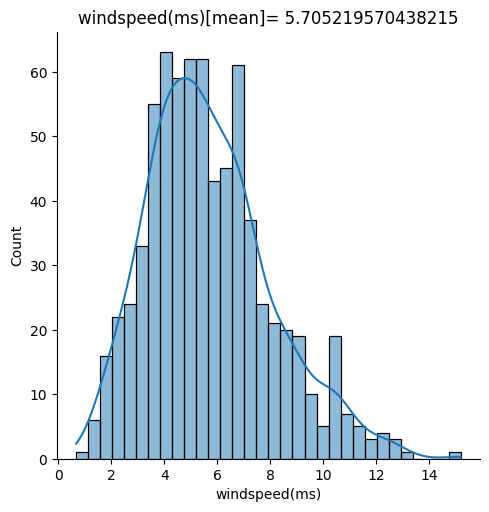

count    731.000000
mean       5.705220
std        2.321125
min        0.670650
25%        4.041864
50%        5.420351
75%        6.984967
max       15.198937
Name: windspeed(ms), dtype: float64


<Figure size 600x600 with 0 Axes>

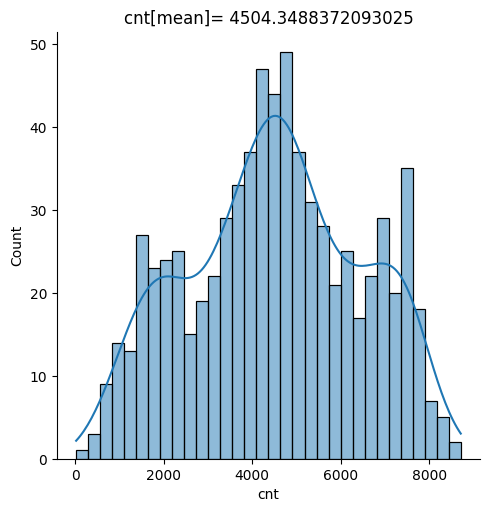

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [59]:
def seaborn_displots(df: pd.DataFrame) -> None:
    for i in df:
        plt.figure(figsize=(6,6))
        sns.displot(df[i], kde=True, bins=int(df.shape[0]*0.045))
        plt.title(label=f'{i}[mean]= {df[i].mean()}')
        plt.show()
        print(df[i].describe())


seaborn_displots(df)


Признаки имеют разный масштаб, значит для дальнейшей работы нам лучше нормировать матрицу объекты-признаки.

### Проблема первая: коллинеарные признаки

Итак, в наших данных один признак дублирует другой, и есть еще два очень похожих. Конечно, мы могли бы сразу удалить дубликаты, но давайте посмотрим, как бы происходило обучение модели, если бы мы не заметили эту проблему. 

Для начала проведем масштабирование, или стандартизацию признаков: из каждого признака вычтем его среднее и поделим на стандартное отклонение. Это можно сделать с помощью метода scale.

Кроме того, нужно перемешать выборку, это потребуется для кросс-валидации.

In [60]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [61]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']

In [62]:
df_shuffled.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
703,4,1,12,0,2,1,1,19.509153,23.45270,73.3750,11.666643,5.215308,6606
33,1,0,2,0,4,1,1,7.665237,8.89390,43.7826,18.609384,8.318902,1550
300,4,0,10,0,5,1,2,13.564153,15.94060,58.5833,15.375093,6.873086,3747
456,2,1,4,0,0,0,2,17.459153,20.86435,67.6250,11.541889,5.159539,6041
633,4,1,9,0,2,1,1,22.550000,27.20895,57.0000,15.833507,7.078009,7538


In [63]:
y.head()

703    6606
33     1550
300    3747
456    6041
633    7538
Name: cnt, dtype: int64

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

In [64]:
from sklearn.linear_model import LinearRegression

## Задание 5

Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели (веса хранятся в переменной `coef_` класса регрессора). Можно выводить пары (название признака, вес), воспользовавшись функцией `zip`, встроенной в язык python. Названия признаков хранятся в переменной `df.columns`.


- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [65]:
reg = LinearRegression().fit(X, y)


def show_reg_coef(reg: LinearRegression) -> None:
    [print(f'w[{x}]= {w}') for x, w in zip(df.columns, reg.coef_)]


show_reg_coef(reg)
print(f'w0= {reg.intercept_}')

w[season]= 570.8649824275465
w[yr]= 1021.9631023507875
w[mnth]= -141.30297353055363
w[holiday]= -86.75813073283305
w[weekday]= 137.22733389864143
w[workingday]= 56.392289569168774
w[weathersit]= -330.2279812756187
w[temp]= 367.4873793462487
w[atemp]= 585.543584601299
w[hum]= -145.61413250496236
w[windspeed(mph)]= 12457135039403.14
w[windspeed(ms)]= -12457135039601.604
w0= 4504.354528212861


Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках. Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов:

$$w = (X^TX)^{-1} X^T y$$

Если в $X$ есть коллинеарные (линейно-зависимые) столбцы, матрица $X^TX$ становится вырожденной, и формула перестает быть корректной. Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация $Xw \approx y$. Такая ситуацию называют _проблемой мультиколлинеарности_.

С парой (temp, atemp) чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

Для того, чтобы решить проблему мультиколлинеарности нужно воспользоваться регуляризатором. К оптимизируемому функционалу прибавляют $L_1$ или $L_2$ норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором --- Ridge.

### Задание 6
Давайте попробуем обучить линейные модели с $L_1$ и $L_2$-регуляризацией, а далее сравним их веса. Обучите регрессоры Ridge и Lasso с параметрами по умолчанию и убедитесь, что проблема с весами решилась.

Обучите линейную модель с $L_1$-регуляризацией (класс Lasso) и выведите веса

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [66]:
from sklearn import linear_model


clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)
show_reg_coef(clf)
print(clf.intercept_)


w[season]= 565.3216570612016
w[yr]= 1020.256101516135
w[mnth]= -133.89500587503792
w[holiday]= -86.66727917692961
w[weekday]= 138.21983421616673
w[workingday]= 55.870356750161285
w[weathersit]= -332.6955547295537
w[temp]= 377.3683235504603
w[atemp]= 575.6727820441073
w[hum]= -144.87124671813484
w[windspeed(mph)]= -198.10557751370777
w[windspeed(ms)]= -2.828522037231819e-08
4504.3488372093025


Обучите линейную модель с $L_2$-регуляризацией (класс Ridge) и выведите веса

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

In [67]:

from sklearn.linear_model import Ridge


clf = Ridge(alpha=1.0)
clf.fit(X, y)
show_reg_coef(clf)
print(clf.intercept_)


w[season]= 563.0645722520193
w[yr]= 1018.9483787875306
w[mnth]= -131.8733202824786
w[holiday]= -86.74609799709202
w[weekday]= 138.00511117871915
w[workingday]= 55.903110375064806
w[weathersit]= -332.3497884990724
w[temp]= 386.4578891919171
w[atemp]= 566.3470470600581
w[hum]= -145.07132729867268
w[windspeed(mph)]= -99.25944108181756
w[windspeed(ms)]= -99.25944115431525
4504.3488372093025


### Задание 7

В отличие от $L_2$-регуляризации, $L_1$ обнуляет веса при некоторых признаках Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$.

Для каждого значения коэффициента из `alphas` обучите регрессор `Lasso` и запишите веса список `coefs_lasso`, а затем обучите `Ridge` и запишите веса в список`coefs_ridge`. Конвертируйте полученные списки в `np.array`.

- ?

In [68]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X, y)
    coefs_lasso.append(list(clf.coef_))
    clf = Ridge(alpha=alpha)
    clf.fit(X, y)
    coefs_ridge.append(list(clf.coef_))


coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

Проанализируйте динамику весов при увеличении параметра регуляризации:

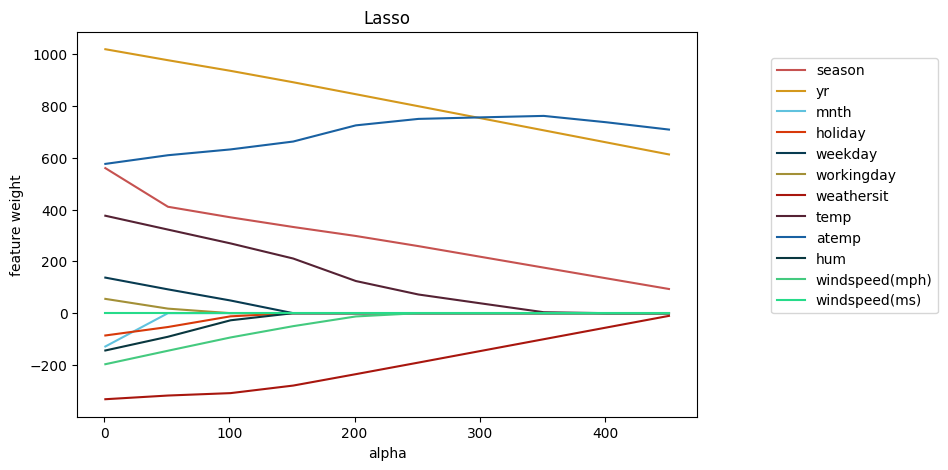

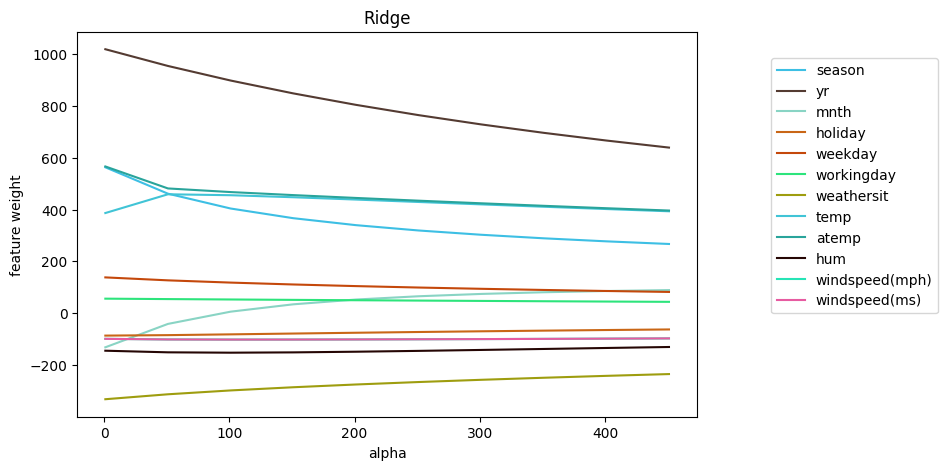

In [69]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проанализируйте графики и дайте ответы на следующие вопросы.

1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
1. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
1. Можно ли утверждать, что `Lasso` исключает один из признаков `windspeed` при любом значении `alpha > 0`? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3}$.
1. Какой из регуляризаторов подойдет для отбора неинформативных признаков?

## 1: Здебільшого `Lasso` більш агресивно зменшує ваги при однаковому збільшенні `alpha`.
## 2: Якщо занадто збільшити `alpha`, то можна 'занулити' ваги, складність моделі занадто спроститься, модель майже не нвчатиметься. Регулятор стає впливати на результат більше ніж модель, доки взагалі не лишиться один регулятор.
## 3: Схоже, що так, один з вагів `windspeed` взагалі при різноманітних знаечннях `alpha`(0.1...500) для `Lasso` - дуже малий, навіть відносно `1`, не те щоб інших ваг. А `Ridge` взагалі соже що обох їх взаємовиключає (симетрично взаємовиключають один-одного).
## 4: `Lasso`, бо він більш швидше 'знецінює' ваги ознак?

### Задание 8

Далее будем работать с `Lasso`.

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть `Mean Square Error`.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ часте, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, __LassoCV__, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную __mse\_path\___, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной alpha\_ будет храниться выбранное значение параметра регуляризации, а в coef\_, традиционно, обученные веса, соответствующие этому alpha_.

Обратите внимание, что регрессор может менять порядок, в котором он проходит по alphas; для сопоставления с матрицей MSE лучше использовать переменную регрессора alphas_.

Обучите регрессор `LassoCV` на всех параметрах регуляризации из alpha. Постройте график _усредненного_ по строкам `MSE` в зависимости от `alpha` (используйте для этого функцию `create_plot`).

Выведите выбранное `alpha`, а также пары "признак-коэффициент" для обученного вектора коэффициентов.

In [72]:
def create_plot(data: np.array, title: str, xlabel: str, ylabel: str, figsize: tuple|None=None) -> None:
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [73]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)
alphas_size = alphas.shape[0]

regressor = LassoCV(cv=3, alphas=alphas, random_state=0).fit(X, y)

In [74]:
regressor.alphas_

array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
       11,  6,  1])

In [75]:
regressor.alpha_

6

In [76]:
regressor.mse_path_  # 3 три блоки валідації по всіх alpha

array([[830768.68693702, 919721.93589263, 805481.54522903],
       [822965.9041311 , 911867.54470864, 804343.02766964],
       [815129.08593972, 903855.55058088, 803483.74706927],
       [807667.98224742, 896148.95236924, 802906.09265381],
       [800137.23263318, 888747.72399201, 801974.9311743 ],
       [793005.6616591 , 881651.8631318 , 800937.92121214],
       [786275.36724172, 874861.36810104, 799342.37031522],
       [779946.35004807, 868376.23749144, 798151.12777192],
       [774018.6100807 , 862196.47012638, 797363.63293845],
       [768492.14733962, 856322.06502308, 796979.89551936],
       [763366.96182482, 850359.8722302 , 796999.92588656],
       [758643.05353631, 844566.95589129, 797423.73295863],
       [754320.42247408, 839080.96310802, 798251.32439694],
       [750399.06863813, 833901.906581  , 799482.70678255],
       [746878.99046623, 829029.79332371, 801117.80350671],
       [742255.05212855, 824464.62917087, 801674.30830821],
       [738465.37393446, 819052.82694159

In [77]:
regressor.coef_

array([ 5.32018983e+02,  1.01506022e+03, -1.00039526e+02, -8.32939599e+01,
        1.32504465e+02,  5.15570856e+01, -3.30559857e+02,  3.70679855e+02,
        5.81396931e+02, -1.40007406e+02, -1.91771408e+02, -2.68553269e-08])

In [78]:
data_draw = np.append(regressor.alphas_.reshape(alphas_size,1), regressor.mse_path_.reshape(alphas_size,3), axis=1)

In [79]:
data_draw  # alpha, mse-bloc-1, mse-bloc-2, mse-bloc-3

array([[9.60000000e+01, 8.30768687e+05, 9.19721936e+05, 8.05481545e+05],
       [9.10000000e+01, 8.22965904e+05, 9.11867545e+05, 8.04343028e+05],
       [8.60000000e+01, 8.15129086e+05, 9.03855551e+05, 8.03483747e+05],
       [8.10000000e+01, 8.07667982e+05, 8.96148952e+05, 8.02906093e+05],
       [7.60000000e+01, 8.00137233e+05, 8.88747724e+05, 8.01974931e+05],
       [7.10000000e+01, 7.93005662e+05, 8.81651863e+05, 8.00937921e+05],
       [6.60000000e+01, 7.86275367e+05, 8.74861368e+05, 7.99342370e+05],
       [6.10000000e+01, 7.79946350e+05, 8.68376237e+05, 7.98151128e+05],
       [5.60000000e+01, 7.74018610e+05, 8.62196470e+05, 7.97363633e+05],
       [5.10000000e+01, 7.68492147e+05, 8.56322065e+05, 7.96979896e+05],
       [4.60000000e+01, 7.63366962e+05, 8.50359872e+05, 7.96999926e+05],
       [4.10000000e+01, 7.58643054e+05, 8.44566956e+05, 7.97423733e+05],
       [3.60000000e+01, 7.54320422e+05, 8.39080963e+05, 7.98251324e+05],
       [3.10000000e+01, 7.50399069e+05, 8.33901907e

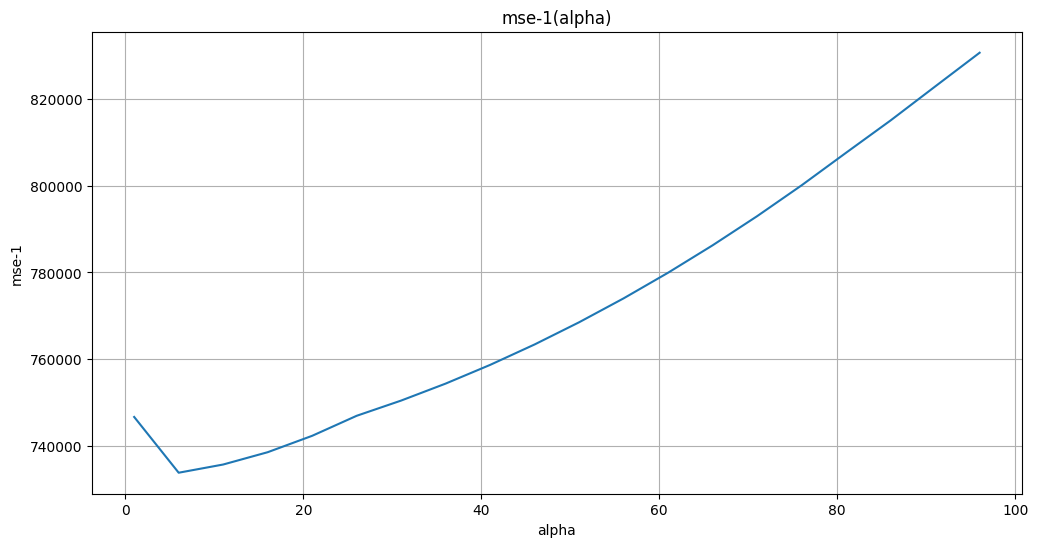

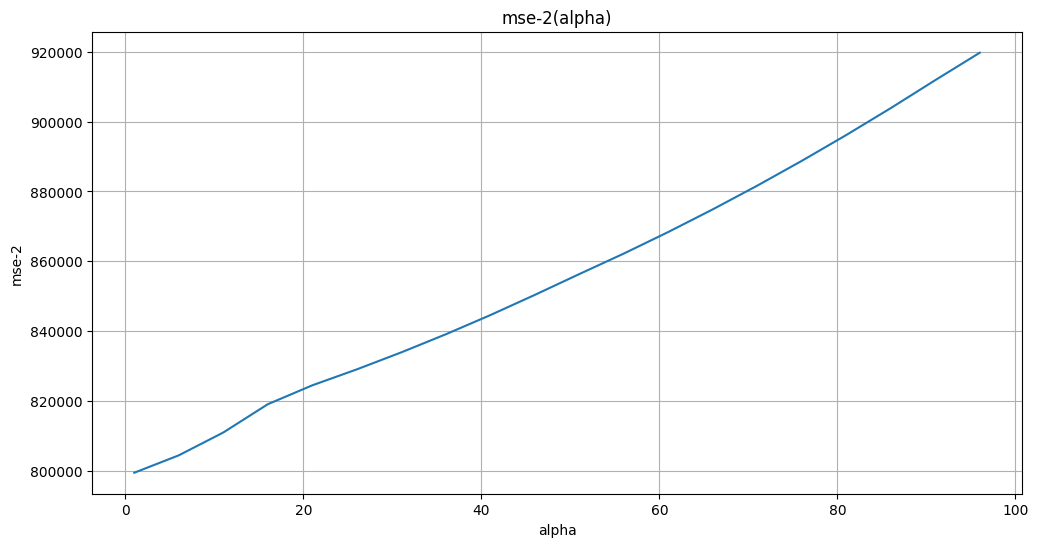

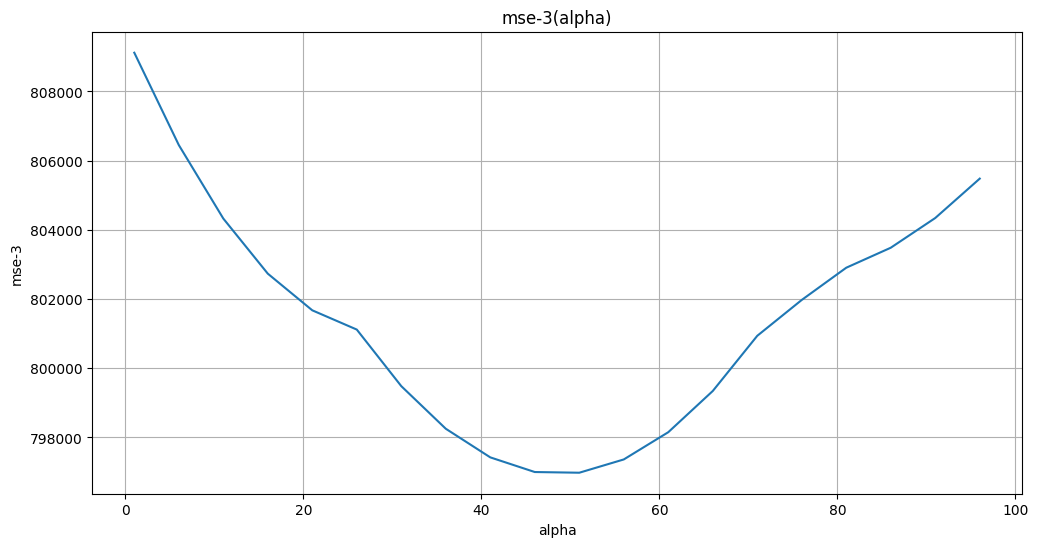

[None, None, None]

In [80]:
[create_plot(data=data_draw[:, [0, el]], title=f'mse-{el}(alpha)', xlabel='alpha', ylabel=f'mse-{el}', figsize=(12, 6)) for el in range(1, data_draw.shape[1])]


- https://sparkbyexamples.com/numpy/numpy-array-mean-function/

- https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels

In [81]:
import random

def create_plots_in_one(data: np.array, title: str, xlabel: str, ylabel: str, figsize: tuple|None=None) -> None:
    """First column as x."""
    size = figsize or (15, 5)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    major_ticks = np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 5)
    minor_ticks = np.arange(np.min(data[:, 0]), np.max(data[:, 0]), 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)

    x = list(map(lambda e: e[0], data))
    for el in range(1, data.shape[1]):
        y = list(map(lambda e: e[el], data))
        plt.plot(
                 x, 
                 y, 
                 label=f'mse-bloc-{el}', 
                 color=random.choice('rgbcmyk'), 
                 linestyle=random.choice(['-', '--', '-.', ':', None]),
                 marker=random.choice('o+xdvs*.^')
                 )

    plt.plot(x, np.mean(data[:, 1:], axis = 1), label='mean', color='k', linestyle=None)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    ax.grid(which='both')
    plt.show()

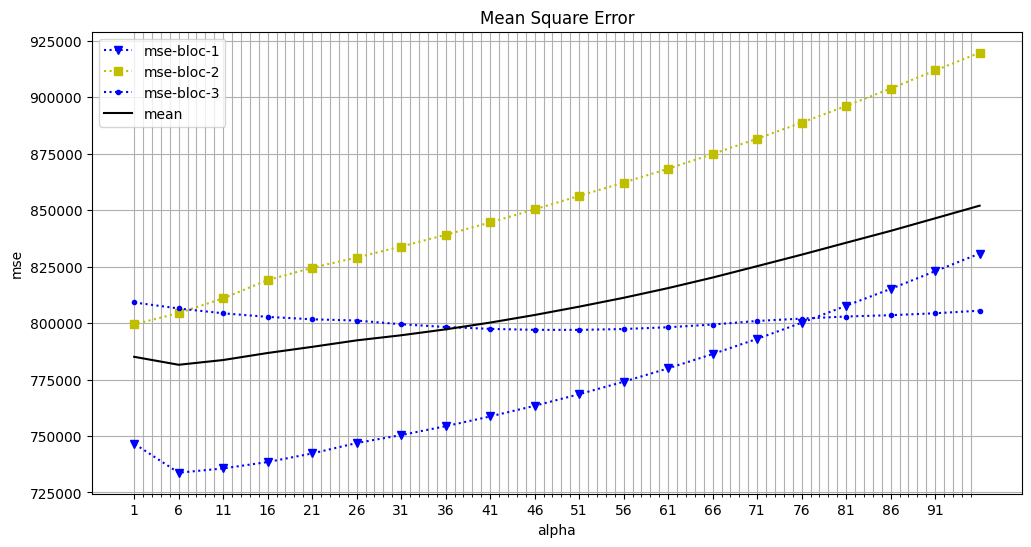

In [82]:
create_plots_in_one(data=data_draw, title=f'Mean Square Error', xlabel='alpha', ylabel=f'mse', figsize=(12, 6))

Итак, мы выбрали некоторый параметр регуляризации. Давайте посмотрим, какие бы мы выбирали alpha, если бы делили выборку только один раз на обучающую и тестовую, то есть рассмотрим траектории MSE, соответствующие отдельным блокам выборки.

### Задание 9

Выведите значения `alpha`, соответствующие минимумам `MSE` на каждом разбиении (то есть по столбцам).
На трех отдельных графиках визуализируйте столбцы `mse_path_`.


In [83]:
[print(f'MSE-bloc-{el}, min: {np.min(data_draw[:, el])}') for el in range(1, data_draw.shape[1])]

MSE-bloc-1, min: 733725.760405224
MSE-bloc-2, min: 799433.1673691698
MSE-bloc-3, min: 796979.8955193625


[None, None, None]

На каждом разбиении оптимальное значение `alpha` свое, и ему соответствует большое MSE на других разбиениях. Получается, что мы настраиваемся на конкретные обучающие и контрольные выборки. При выборе `alpha` на кросс-валидации мы выбираем нечто "среднее", что будет давать приемлемое значение метрики на разных разбиениях выборки. 

### Задание 10

Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Ответьте на следующие вопросы.

#### Вопрос 1

В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей `cnt` от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость `cnt` от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды? 

- https://stackoverflow.com/questions/4215472/python-take-max-n-elements-from-some-list

__Ответ:__

In [ ]:
# import heapq


# [df.columns[np.where(regressor.coef_ == el)[0][0]] for el in heapq.nlargest(4, regressor.coef_)]

# => duplicate same weights = duplicate features

['yr', 'atemp', 'season', 'temp']

In [ ]:
# strong_features = []
# [strong_features.extend(list(feature)) for feature in [df.columns[np.where(regressor.coef_ == el)[0]] for el in heapq.nlargest(4, regressor.coef_)]]
# strong_features = set(strong_features)
# strong_features

# => mismatch order

{'atemp', 'season', 'temp', 'yr'}

In [84]:
def get_strongest_positive_features(coef: np.array, df: pd.DataFrame, limit: int=5) -> list:
    order = sorted([(f, cf) for cf, f in zip(coef, df.columns)], key=lambda tup: tup[1], reverse=True)[:limit]
    # [print(el) for el in order]
    return [el for el in order]


In [85]:
get_strongest_positive_features(regressor.coef_, df, limit=4)  # feature, weight

[('yr', 1015.0602226430597),
 ('atemp', 581.3969310655002),
 ('season', 532.0189828413536),
 ('temp', 370.67985503003166)]

#### Вопрос 2

Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?

__Ответ:__

In [86]:
def get_strongest_negative_features(coef: np.array, df: pd.DataFrame, limit: int=5) -> list:
    order = [el for el in sorted([(f, cf) for cf, f in zip(coef, df.columns)], key=lambda tup: tup[1], reverse=False) if el[1] < 0]
    # [print(el) for el in order[:limit]]
    return [el for el in order[:limit]]

In [87]:
strongest_negative_features = get_strongest_negative_features(regressor.coef_, df, limit=3)  # feature, weight
strongest_negative_features

[('weathersit', -330.5598567399815),
 ('windspeed(mph)', -191.7714084713498),
 ('hum', -140.00740550068855)]

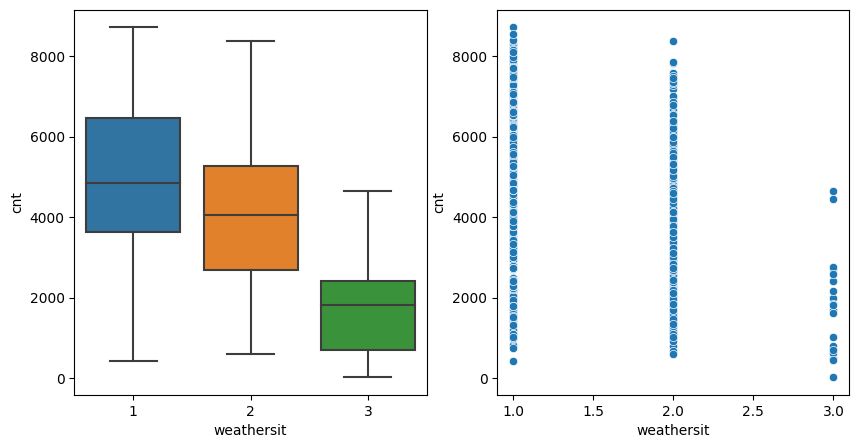

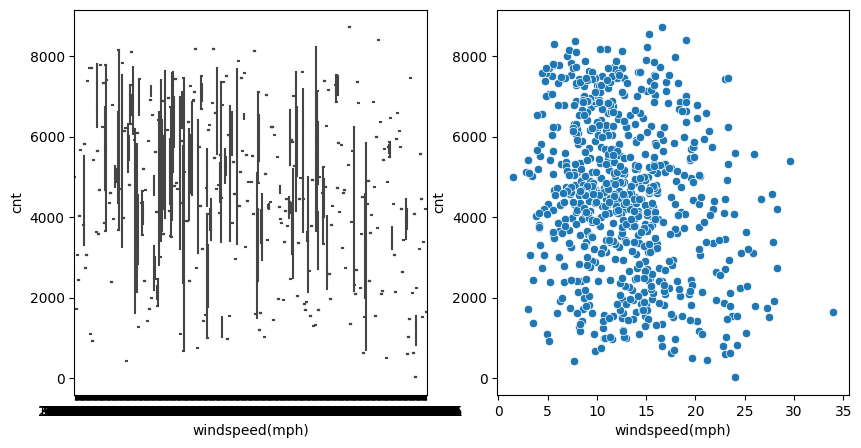

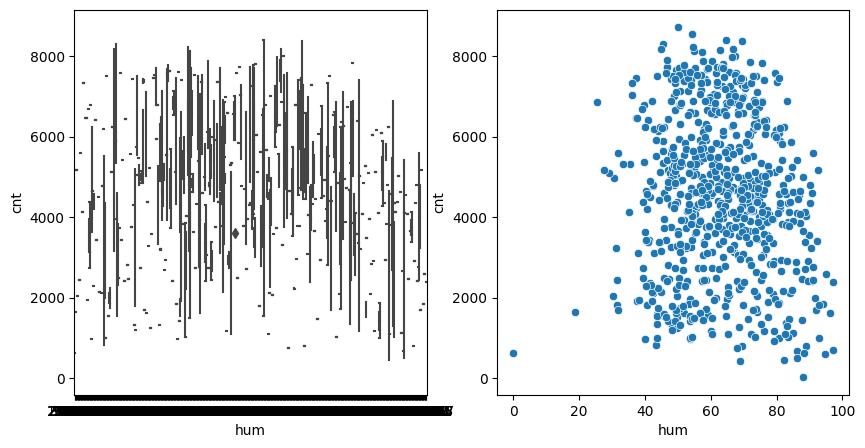

In [88]:
seaborn_plotter(df[[el[0] for el in strongest_negative_features]], df.iloc[:, -1], df)

<Figure size 600x600 with 0 Axes>

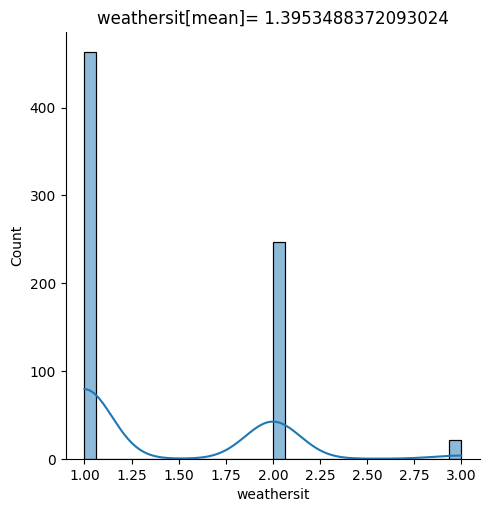

count    731.000000
mean       1.395349
std        0.544894
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64


<Figure size 600x600 with 0 Axes>

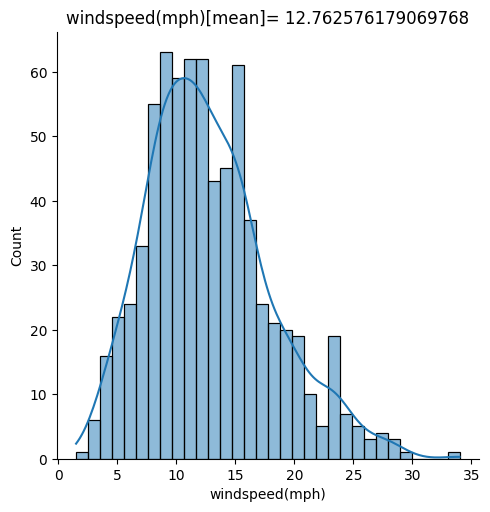

count    731.000000
mean      12.762576
std        5.192357
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625371
max       34.000021
Name: windspeed(mph), dtype: float64


<Figure size 600x600 with 0 Axes>

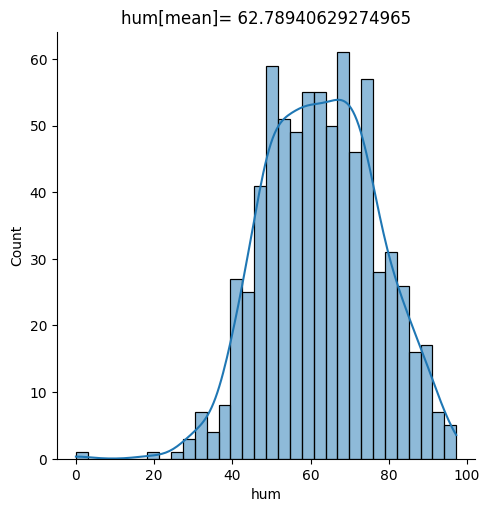

count    731.000000
mean      62.789406
std       14.242910
min        0.000000
25%       52.000000
50%       62.666700
75%       73.020850
max       97.250000
Name: hum, dtype: float64


In [89]:
seaborn_displots(df[[el[0] for el in strongest_negative_features]])

In [90]:
df[[el[0] for el in strongest_negative_features]].corrwith(df['cnt'])

weathersit       -0.297391
windspeed(mph)   -0.234545
hum              -0.100659
dtype: float64

##  Як бачимо за `weathersit` найбільше схоже на спадаючу наближену лінійну залежність, хоча і далеченько до `-1`, за графіком розподілу мабуть можна вважати наявність спадаючої лінійної залежності. А от для `windspeed` та `hum` важко прийняти за лініну залежність, та і графіки розподілу дуже нагадують розподіл Ґауса (нормальний розподіл). Тому логічно стверджувати що явно лише за збільшенням `weathersit` менше людей наважаться поганяти на арендованих бАйках.

#### Вопрос 3

Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?

__Ответ:__

In [91]:
def get_weakest_features(coef: np.array, df: pd.DataFrame, limit: float=0.001) -> list:
    order = [el for el in sorted([(f, cf) for cf, f in zip(coef, df.columns)], key=lambda tup: tup[1], reverse=False) if abs(el[1])  <= limit]
    # [print(el) for el in order[:limit]]
    return [el for el in order]

In [92]:
weakest_features = get_weakest_features(regressor.coef_, df, limit=0.1)  # feature, weight
weakest_features

[('windspeed(ms)', -2.6855326892515688e-08)]

## В даному випадку при нашій регресії `windspeed(ms)` був виключений, бо ідентичний параметру `windspeed(mph)` (те саме значення в іншій розмірності), інших з такими обмеженнями не виявлено. Чим більше коефіцієнти наближаються до 0 (відносно інших коефіцієнтів) тим менше вони впливають на результати за нашою моделлю, це може означати або вони дійсно ніяк не впливають на попит байків, або настільки слабо впливають, відносно інших ознак, що наша модель вирішила ними 'знехтувати'(знецінити). Не хочеться вірити, але може бути занадто складна взаємозалежність відомих/невідомих ознак, що виявилася невиявлена нашою `простою` моделлю, бо за відомими ознаками значення хаотично розкидані.

### Заключение
Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно, по возможности не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации. 

Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3), потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель. Такой процесс занимает много времени, особенно если нужно обучаться на больших объемах данных.

## Згоден ^_^